C:\Users\Dom\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import numpy as np
import pandas as pd
import time
import sklearn


readdata = pd.read_csv("/home/dom/Documents/MPhys/TheGrandTour/wine_data.txt", sep="\t", header=None);
data = np.array(readdata);
data = np.delete(data, 0, 0)
data = data.astype(float)
data = np.swapaxes(data,0,1)


# Need to seperate the classification dimension:
classification = data[13]
data = np.delete(data, 13, axis=0)


# make list of colours for each number:
data_colour = []
for i in range(len(classification)):
    if classification[i] == 1:
        data_colour.append("r")
    elif classification[i] == 2:
        data_colour.append("b")
    elif classification[i] == 3:
        data_colour.append("g")
        
# Normalizes the data        
for i in range(0, np.shape(data)[0]):
    data[i,:] = (data[i,:] / np.ndarray.max(data[i,:])) * 2 - 1
    
        


#VARIABLES
stepSize = 0.01
nSteps = 10000

def getAlpha(d):
    """
    NEEDS IMPLEMENTATION
    Should produce 1xd(d-1)/2 array of position in grand tour.
    """
    p = d*(d-1)/2     
    primeList = []
    count = 1
    while len(primeList) < p:
        count += 1
        primeBool = False
        for i in range(2, count - 1):
            if count % i == 0:
                primeBool = True
        if primeBool == False:
            irrational = (np.sqrt(count)%1)
            primeList.append(irrational)
            
    primeList = np.asarray(primeList)
    primeList = primeList.dot(stepSize)
    """
    Irrational number generation using exponentials, not being used
    p = int(d*(d-1)/2)
    alpha = np.zeros(p) #alpha(t) parameters defining grand tour in G2,d
    for i in range(0,p):
        alpha[i] = (np.exp(i) % 1) * 2 * np.pi
        
    alpha = alpha.dot(0.001)
    """
    
    
    return primeList


def getAngles(alpha,d):
    """""
    Inputs: 
    alpha = 1xd(d-1)/2 array defining position on grand tour
    d = dimensions of data
    Outputs a dxd array of angles required for the transformation
    """
    theta = np.zeros((d,d));
    i = 0;
    k = 0;
    
    while i < d-1:
        j = i + 1;
        
        while j < d:
            theta[i][j] = alpha[k];
            j += 1;
            k += 1;
    
        i+= 1;
        
    return theta;


def RotationMatrix(i, j, d, theta):
    """
    Inputs:
    i = first indicie of rotating plane
    j = second indicie of rotating plane
    d = dimensions of data
    theta = dxd array of angle of rotation of rotating plane
    Outputs a rotating matrix to rotate plane of ixj plane by theta_ij
    """
    R = np.identity(d)
    R[i,i] = np.cos(theta)
    R[i,j] = -1*np.sin(theta)
    R[j,i] = np.sin(theta)
    R[j,j] = np.cos(theta)
    return R


def BetaFn(d, theta):
    """
    Inputs:
    d = dimensions of data
    theta = dxd array of angle of rotation ixj plane
    Outputs the full matrix transformation for all rotations
    """
    b = RotationMatrix(1, 2, d, theta[1,2])
    i = 1
    j = 2
    for i in range(d):
        for j in range(d):
            if j <= i:
                continue
            if i==1 and j==2:
                continue
            b = np.matmul(b, RotationMatrix(i, j, d, theta[i,j]))
            
    return b


def GrandTour(data, nSteps):
    """
    Inputs:
    data = array of data points, dimensions x npoints
    Outputs a 3D array number of points x t x dimensions, where t
    the time step at that point in the tour
    """

    d = np.shape(data)[0] #dimensions of data
    nPoints = np.shape(data)[1] #number of data points
    tData = np.zeros((nSteps,d,nPoints)) #initialise 3d matrix to store stransforemd data at each timestep
    tBeta = np.zeros((nSteps,d,d))
    Alpha = getAlpha(d)

    
    for t in range(0, nSteps):
        
        
        alpha = Alpha.dot(t)
        theta = getAngles(alpha, d)
        b = BetaFn(d, theta)
        a = np.matmul(b, data)
        tData[t,:,:] = a
        tBeta[t,:,:] = b
        
    return tData, tBeta


tData, tBeta = GrandTour(data, nSteps)


In [3]:
import tensorflow as tf
import tensorflow.keras as keras

In [4]:
targetData = np.zeros((len(tData[0][0]), 3))
for counter, i in enumerate(classification):
    targetData[counter][int(i-1)] = 1
targetData

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [5]:
import time

accuracy = []

start = time.clock()

init_op = tf.global_variables_initializer()

#with tf.Session() as sess:
#    sess.run(init_op)
    
for i in range(999):

    if i % 10 == 0:
        print(time.clock() - start)
        print("!!!!!!!!!  " + str(i) + "  !!!!!!!!")
        
    tf.reset_default_graph()

    xData = tData[i][0]
    yData = tData[i][1]
    trainingData = np.vstack((xData, yData)).T
    # NN model code
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(20, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(20, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(3, activation=tf.nn.softmax))

    model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    nnet = model.fit(trainingData, targetData, epochs=2)
    accuracy.append(np.mean(nnet.history["acc"]))

print(accuracy)

0.012369999999998882
!!!!!!!!!  0  !!!!!!!!
Epoch 1/2
178/178 [==============================] - 0s 1ms/step - loss: 1.0623 - acc: 0.5393
Epoch 2/2
178/178 [==============================] - 0s 40us/step - loss: 1.0527 - acc: 0.5393
Epoch 1/2
178/178 [==============================] - 0s 740us/step - loss: 1.0440 - acc: 0.5337
Epoch 2/2
178/178 [==============================] - 0s 55us/step - loss: 1.0372 - acc: 0.5506
Epoch 1/2
178/178 [==============================] - 0s 642us/step - loss: 1.0288 - acc: 0.5506
Epoch 2/2
178/178 [==============================] - 0s 43us/step - loss: 1.0217 - acc: 0.5281
Epoch 1/2
178/178 [==============================] - 0s 594us/step - loss: 1.0130 - acc: 0.5225
Epoch 2/2
178/178 [==============================] - 0s 39us/step - loss: 1.0062 - acc: 0.5281
Epoch 1/2
178/178 [==============================] - 0s 642us/step - loss: 0.9973 - acc: 0.5281
Epoch 2/2
178/178 [==============================] - 0s 37us/step - loss: 0.9894 - acc: 0.5281
Epo

178/178 [==============================] - 0s 44us/step - loss: 0.8714 - acc: 0.6180
Epoch 1/2
178/178 [==============================] - 0s 577us/step - loss: 0.8749 - acc: 0.6124
Epoch 2/2
178/178 [==============================] - 0s 43us/step - loss: 0.8701 - acc: 0.6067
Epoch 1/2
178/178 [==============================] - 0s 574us/step - loss: 0.8725 - acc: 0.6067
Epoch 2/2
178/178 [==============================] - 0s 38us/step - loss: 0.8679 - acc: 0.6067
Epoch 1/2
178/178 [==============================] - 0s 624us/step - loss: 0.8695 - acc: 0.6124
Epoch 2/2
178/178 [==============================] - 0s 42us/step - loss: 0.8620 - acc: 0.6236
Epoch 1/2
178/178 [==============================] - 0s 601us/step - loss: 0.8646 - acc: 0.6180
Epoch 2/2
178/178 [==============================] - 0s 38us/step - loss: 0.8594 - acc: 0.6124
Epoch 1/2
178/178 [==============================] - 0s 581us/step - loss: 0.8602 - acc: 0.6180
Epoch 2/2
178/178 [==============================] - 0s

178/178 [==============================] - 0s 34us/step - loss: 0.4884 - acc: 0.8146
Epoch 1/2
178/178 [==============================] - 0s 563us/step - loss: 0.4895 - acc: 0.8202
Epoch 2/2
178/178 [==============================] - 0s 42us/step - loss: 0.4805 - acc: 0.8202
Epoch 1/2
178/178 [==============================] - 0s 598us/step - loss: 0.4817 - acc: 0.8258
Epoch 2/2
178/178 [==============================] - 0s 40us/step - loss: 0.4774 - acc: 0.8427
Epoch 1/2
178/178 [==============================] - 0s 632us/step - loss: 0.4741 - acc: 0.8427
Epoch 2/2
178/178 [==============================] - 0s 33us/step - loss: 0.4674 - acc: 0.8427
Epoch 1/2
178/178 [==============================] - 0s 581us/step - loss: 0.4682 - acc: 0.8258
Epoch 2/2
178/178 [==============================] - 0s 39us/step - loss: 0.4611 - acc: 0.8258
Epoch 1/2
178/178 [==============================] - 0s 635us/step - loss: 0.4647 - acc: 0.8427
Epoch 2/2
178/178 [==============================] - 0s

178/178 [==============================] - 0s 34us/step - loss: 0.5492 - acc: 0.7921
Epoch 1/2
178/178 [==============================] - 0s 631us/step - loss: 0.5998 - acc: 0.7472
Epoch 2/2
178/178 [==============================] - 0s 66us/step - loss: 0.5946 - acc: 0.7584
Epoch 1/2
178/178 [==============================] - 0s 587us/step - loss: 0.6545 - acc: 0.7191
Epoch 2/2
178/178 [==============================] - 0s 36us/step - loss: 0.6513 - acc: 0.7360
Epoch 1/2
178/178 [==============================] - 0s 598us/step - loss: 0.7305 - acc: 0.7079
Epoch 2/2
178/178 [==============================] - 0s 54us/step - loss: 0.7235 - acc: 0.7191
Epoch 1/2
178/178 [==============================] - 0s 639us/step - loss: 0.8153 - acc: 0.6798
Epoch 2/2
178/178 [==============================] - 0s 36us/step - loss: 0.8125 - acc: 0.6629
70.734442
!!!!!!!!!  130  !!!!!!!!
Epoch 1/2
178/178 [==============================] - 0s 633us/step - loss: 0.9161 - acc: 0.6236
Epoch 2/2
178/178 [=

178/178 [==============================] - 0s 31us/step - loss: 0.3789 - acc: 0.8596
Epoch 1/2
178/178 [==============================] - 0s 638us/step - loss: 0.3809 - acc: 0.8652
Epoch 2/2
178/178 [==============================] - 0s 41us/step - loss: 0.3765 - acc: 0.8708
Epoch 1/2
178/178 [==============================] - 0s 575us/step - loss: 0.3806 - acc: 0.8652
Epoch 2/2
178/178 [==============================] - 0s 41us/step - loss: 0.3741 - acc: 0.8708
92.34778
!!!!!!!!!  170  !!!!!!!!
Epoch 1/2
178/178 [==============================] - 0s 629us/step - loss: 0.3816 - acc: 0.8764
Epoch 2/2
178/178 [==============================] - 0s 55us/step - loss: 0.3764 - acc: 0.8596
Epoch 1/2
178/178 [==============================] - 0s 612us/step - loss: 0.3841 - acc: 0.8652
Epoch 2/2
178/178 [==============================] - 0s 47us/step - loss: 0.3790 - acc: 0.8596
Epoch 1/2
178/178 [==============================] - 0s 662us/step - loss: 0.3931 - acc: 0.8596
Epoch 2/2
178/178 [==

178/178 [==============================] - 0s 37us/step - loss: 0.4530 - acc: 0.8202
114.563063
!!!!!!!!!  210  !!!!!!!!
Epoch 1/2
178/178 [==============================] - 0s 576us/step - loss: 0.4448 - acc: 0.8202
Epoch 2/2
178/178 [==============================] - 0s 63us/step - loss: 0.4392 - acc: 0.8258
Epoch 1/2
178/178 [==============================] - 0s 578us/step - loss: 0.4307 - acc: 0.8258
Epoch 2/2
178/178 [==============================] - 0s 39us/step - loss: 0.4278 - acc: 0.8315
Epoch 1/2
178/178 [==============================] - 0s 635us/step - loss: 0.4189 - acc: 0.8427
Epoch 2/2
178/178 [==============================] - 0s 47us/step - loss: 0.4154 - acc: 0.8315
Epoch 1/2
178/178 [==============================] - 0s 592us/step - loss: 0.4060 - acc: 0.8371
Epoch 2/2
178/178 [==============================] - 0s 47us/step - loss: 0.4018 - acc: 0.8315
Epoch 1/2
178/178 [==============================] - 0s 645us/step - loss: 0.3943 - acc: 0.8427
Epoch 2/2
178/178 [

Epoch 2/2
178/178 [==============================] - 0s 32us/step - loss: 0.4703 - acc: 0.7865
Epoch 1/2
178/178 [==============================] - 0s 611us/step - loss: 0.4556 - acc: 0.7809
Epoch 2/2
178/178 [==============================] - 0s 55us/step - loss: 0.4517 - acc: 0.7921
Epoch 1/2
178/178 [==============================] - 0s 643us/step - loss: 0.4407 - acc: 0.8090
Epoch 2/2
178/178 [==============================] - 0s 37us/step - loss: 0.4374 - acc: 0.8202
Epoch 1/2
178/178 [==============================] - 0s 586us/step - loss: 0.4276 - acc: 0.8090
Epoch 2/2
178/178 [==============================] - 0s 38us/step - loss: 0.4220 - acc: 0.8202
Epoch 1/2
178/178 [==============================] - 0s 610us/step - loss: 0.4132 - acc: 0.8146
Epoch 2/2
178/178 [==============================] - 0s 36us/step - loss: 0.4088 - acc: 0.8202
Epoch 1/2
178/178 [==============================] - 0s 622us/step - loss: 0.4015 - acc: 0.8315
Epoch 2/2
178/178 [==========================

178/178 [==============================] - 0s 34us/step - loss: 0.3142 - acc: 0.8652
Epoch 1/2
178/178 [==============================] - 0s 643us/step - loss: 0.3186 - acc: 0.8596
Epoch 2/2
178/178 [==============================] - 0s 56us/step - loss: 0.3164 - acc: 0.8652
Epoch 1/2
178/178 [==============================] - 0s 581us/step - loss: 0.3236 - acc: 0.8596
Epoch 2/2
178/178 [==============================] - 0s 37us/step - loss: 0.3238 - acc: 0.8708
Epoch 1/2
178/178 [==============================] - 0s 626us/step - loss: 0.3290 - acc: 0.8652
Epoch 2/2
178/178 [==============================] - 0s 39us/step - loss: 0.3273 - acc: 0.8652
Epoch 1/2
178/178 [==============================] - 0s 596us/step - loss: 0.3367 - acc: 0.8371
Epoch 2/2
178/178 [==============================] - 0s 46us/step - loss: 0.3347 - acc: 0.8483
Epoch 1/2
178/178 [==============================] - 0s 590us/step - loss: 0.3445 - acc: 0.8371
Epoch 2/2
178/178 [==============================] - 0s

178/178 [==============================] - 0s 37us/step - loss: 0.6639 - acc: 0.6966
Epoch 1/2
178/178 [==============================] - 0s 597us/step - loss: 0.6482 - acc: 0.6966
Epoch 2/2
178/178 [==============================] - 0s 36us/step - loss: 0.6405 - acc: 0.6966
Epoch 1/2
178/178 [==============================] - 0s 593us/step - loss: 0.6259 - acc: 0.7079
Epoch 2/2
178/178 [==============================] - 0s 38us/step - loss: 0.6206 - acc: 0.7135
Epoch 1/2
178/178 [==============================] - 0s 575us/step - loss: 0.6050 - acc: 0.7247
Epoch 2/2
178/178 [==============================] - 0s 36us/step - loss: 0.6004 - acc: 0.7303
Epoch 1/2
178/178 [==============================] - 0s 638us/step - loss: 0.5889 - acc: 0.7528
Epoch 2/2
178/178 [==============================] - 0s 47us/step - loss: 0.5830 - acc: 0.7416
185.47531500000002
!!!!!!!!!  340  !!!!!!!!
Epoch 1/2
178/178 [==============================] - 0s 639us/step - loss: 0.5710 - acc: 0.7640
Epoch 2/2
1

178/178 [==============================] - 0s 43us/step - loss: 0.4853 - acc: 0.7528
Epoch 1/2
178/178 [==============================] - 0s 592us/step - loss: 0.4896 - acc: 0.7528
Epoch 2/2
178/178 [==============================] - 0s 49us/step - loss: 0.4881 - acc: 0.7528
Epoch 1/2
178/178 [==============================] - 0s 594us/step - loss: 0.4927 - acc: 0.7472
Epoch 2/2
178/178 [==============================] - 0s 43us/step - loss: 0.4912 - acc: 0.7528
207.111645
!!!!!!!!!  380  !!!!!!!!
Epoch 1/2
178/178 [==============================] - 0s 565us/step - loss: 0.4967 - acc: 0.7472
Epoch 2/2
178/178 [==============================] - 0s 50us/step - loss: 0.4948 - acc: 0.7303
Epoch 1/2
178/178 [==============================] - 0s 640us/step - loss: 0.4987 - acc: 0.7528
Epoch 2/2
178/178 [==============================] - 0s 53us/step - loss: 0.4976 - acc: 0.7528
Epoch 1/2
178/178 [==============================] - 0s 555us/step - loss: 0.5017 - acc: 0.7472
Epoch 2/2
178/178 [

178/178 [==============================] - 0s 42us/step - loss: 0.5448 - acc: 0.7135
229.24078
!!!!!!!!!  420  !!!!!!!!
Epoch 1/2
178/178 [==============================] - 0s 714us/step - loss: 0.5439 - acc: 0.7135
Epoch 2/2
178/178 [==============================] - 0s 45us/step - loss: 0.5428 - acc: 0.7135
Epoch 1/2
178/178 [==============================] - 0s 598us/step - loss: 0.5412 - acc: 0.7303
Epoch 2/2
178/178 [==============================] - 0s 56us/step - loss: 0.5403 - acc: 0.7247
Epoch 1/2
178/178 [==============================] - 0s 573us/step - loss: 0.5398 - acc: 0.7303
Epoch 2/2
178/178 [==============================] - 0s 51us/step - loss: 0.5384 - acc: 0.7247
Epoch 1/2
178/178 [==============================] - 0s 654us/step - loss: 0.5354 - acc: 0.7360
Epoch 2/2
178/178 [==============================] - 0s 55us/step - loss: 0.5349 - acc: 0.7360
Epoch 1/2
178/178 [==============================] - 0s 611us/step - loss: 0.5343 - acc: 0.7360
Epoch 2/2
178/178 [=

178/178 [==============================] - 0s 622us/step - loss: 0.3670 - acc: 0.8371
Epoch 2/2
178/178 [==============================] - 0s 49us/step - loss: 0.3640 - acc: 0.8371
Epoch 1/2
178/178 [==============================] - 0s 591us/step - loss: 0.3586 - acc: 0.8427
Epoch 2/2
178/178 [==============================] - 0s 47us/step - loss: 0.3549 - acc: 0.8427
Epoch 1/2
178/178 [==============================] - 0s 582us/step - loss: 0.3467 - acc: 0.8483
Epoch 2/2
178/178 [==============================] - 0s 45us/step - loss: 0.3447 - acc: 0.8483
Epoch 1/2
178/178 [==============================] - 0s 664us/step - loss: 0.3346 - acc: 0.8652
Epoch 2/2
178/178 [==============================] - 0s 52us/step - loss: 0.3325 - acc: 0.8652
Epoch 1/2
178/178 [==============================] - 0s 571us/step - loss: 0.3233 - acc: 0.8764
Epoch 2/2
178/178 [==============================] - 0s 48us/step - loss: 0.3196 - acc: 0.8820
Epoch 1/2
178/178 [==============================] - 0s

178/178 [==============================] - 0s 633us/step - loss: 0.4878 - acc: 0.7753
Epoch 2/2
178/178 [==============================] - 0s 29us/step - loss: 0.4830 - acc: 0.7865
Epoch 1/2
178/178 [==============================] - 0s 705us/step - loss: 0.5158 - acc: 0.7753
Epoch 2/2
178/178 [==============================] - 0s 54us/step - loss: 0.5066 - acc: 0.7753
Epoch 1/2
178/178 [==============================] - 0s 651us/step - loss: 0.5379 - acc: 0.7640
Epoch 2/2
178/178 [==============================] - 0s 51us/step - loss: 0.5256 - acc: 0.7584
Epoch 1/2
178/178 [==============================] - 0s 638us/step - loss: 0.5574 - acc: 0.7360
Epoch 2/2
178/178 [==============================] - 0s 70us/step - loss: 0.5443 - acc: 0.7528
Epoch 1/2
178/178 [==============================] - 0s 628us/step - loss: 0.5703 - acc: 0.7416
Epoch 2/2
178/178 [==============================] - 0s 55us/step - loss: 0.5571 - acc: 0.7472
Epoch 1/2
178/178 [==============================] - 0s

178/178 [==============================] - 0s 573us/step - loss: 0.2464 - acc: 0.9045
Epoch 2/2
178/178 [==============================] - 0s 31us/step - loss: 0.2446 - acc: 0.9101
Epoch 1/2
178/178 [==============================] - 0s 574us/step - loss: 0.2432 - acc: 0.9101
Epoch 2/2
178/178 [==============================] - 0s 48us/step - loss: 0.2420 - acc: 0.9157
Epoch 1/2
178/178 [==============================] - 0s 566us/step - loss: 0.2412 - acc: 0.9101
Epoch 2/2
178/178 [==============================] - 0s 64us/step - loss: 0.2405 - acc: 0.9101
Epoch 1/2
178/178 [==============================] - 0s 583us/step - loss: 0.2394 - acc: 0.9101
Epoch 2/2
178/178 [==============================] - 0s 55us/step - loss: 0.2378 - acc: 0.9045
Epoch 1/2
178/178 [==============================] - 0s 625us/step - loss: 0.2377 - acc: 0.8933
Epoch 2/2
178/178 [==============================] - 0s 54us/step - loss: 0.2366 - acc: 0.9045
300.443446
!!!!!!!!!  550  !!!!!!!!
Epoch 1/2
178/178 [

178/178 [==============================] - 0s 634us/step - loss: 0.4879 - acc: 0.7697
Epoch 2/2
178/178 [==============================] - 0s 30us/step - loss: 0.4778 - acc: 0.7753
Epoch 1/2
178/178 [==============================] - 0s 569us/step - loss: 0.4999 - acc: 0.7697
Epoch 2/2
178/178 [==============================] - 0s 48us/step - loss: 0.4904 - acc: 0.7809
Epoch 1/2
178/178 [==============================] - 0s 633us/step - loss: 0.5090 - acc: 0.7753
Epoch 2/2
178/178 [==============================] - 0s 56us/step - loss: 0.5014 - acc: 0.7753
322.29024799999996
!!!!!!!!!  590  !!!!!!!!
Epoch 1/2
178/178 [==============================] - 0s 630us/step - loss: 0.5220 - acc: 0.7584
Epoch 2/2
178/178 [==============================] - 0s 58us/step - loss: 0.5132 - acc: 0.7697
Epoch 1/2
178/178 [==============================] - 0s 567us/step - loss: 0.5303 - acc: 0.7753
Epoch 2/2
178/178 [==============================] - 0s 46us/step - loss: 0.5209 - acc: 0.7753
Epoch 1/2
1

178/178 [==============================] - 0s 634us/step - loss: 0.5214 - acc: 0.7697
Epoch 2/2
178/178 [==============================] - 0s 30us/step - loss: 0.5201 - acc: 0.7697
344.21107
!!!!!!!!!  630  !!!!!!!!
Epoch 1/2
178/178 [==============================] - 0s 611us/step - loss: 0.5258 - acc: 0.7528
Epoch 2/2
178/178 [==============================] - 0s 47us/step - loss: 0.5240 - acc: 0.7584
Epoch 1/2
178/178 [==============================] - 0s 640us/step - loss: 0.5301 - acc: 0.7528
Epoch 2/2
178/178 [==============================] - 0s 50us/step - loss: 0.5290 - acc: 0.7528
Epoch 1/2
178/178 [==============================] - 0s 599us/step - loss: 0.5367 - acc: 0.7416
Epoch 2/2
178/178 [==============================] - 0s 50us/step - loss: 0.5353 - acc: 0.7360
Epoch 1/2
178/178 [==============================] - 0s 642us/step - loss: 0.5416 - acc: 0.7191
Epoch 2/2
178/178 [==============================] - 0s 49us/step - loss: 0.5422 - acc: 0.7360
Epoch 1/2
178/178 [=

178/178 [==============================] - 0s 45us/step - loss: 0.6394 - acc: 0.6798
Epoch 1/2
178/178 [==============================] - 0s 702us/step - loss: 0.6422 - acc: 0.6910
Epoch 2/2
178/178 [==============================] - 0s 56us/step - loss: 0.6401 - acc: 0.6910
Epoch 1/2
178/178 [==============================] - 0s 579us/step - loss: 0.6419 - acc: 0.6910
Epoch 2/2
178/178 [==============================] - 0s 52us/step - loss: 0.6376 - acc: 0.6966
Epoch 1/2
178/178 [==============================] - 0s 615us/step - loss: 0.6432 - acc: 0.6966
Epoch 2/2
178/178 [==============================] - 0s 58us/step - loss: 0.6372 - acc: 0.7079
Epoch 1/2
178/178 [==============================] - 0s 629us/step - loss: 0.6400 - acc: 0.6854
Epoch 2/2
178/178 [==============================] - 0s 43us/step - loss: 0.6392 - acc: 0.7135
Epoch 1/2
178/178 [==============================] - 0s 644us/step - loss: 0.6408 - acc: 0.7191
Epoch 2/2
178/178 [==============================] - 0s

178/178 [==============================] - 0s 38us/step - loss: 0.5292 - acc: 0.7865
Epoch 1/2
178/178 [==============================] - 0s 574us/step - loss: 0.5353 - acc: 0.7809
Epoch 2/2
178/178 [==============================] - 0s 48us/step - loss: 0.5349 - acc: 0.7809
Epoch 1/2
178/178 [==============================] - 0s 561us/step - loss: 0.5386 - acc: 0.7697
Epoch 2/2
178/178 [==============================] - 0s 59us/step - loss: 0.5387 - acc: 0.7640
Epoch 1/2
178/178 [==============================] - 0s 604us/step - loss: 0.5446 - acc: 0.7640
Epoch 2/2
178/178 [==============================] - 0s 58us/step - loss: 0.5432 - acc: 0.7528
Epoch 1/2
178/178 [==============================] - 0s 563us/step - loss: 0.5549 - acc: 0.7472
Epoch 2/2
178/178 [==============================] - 0s 54us/step - loss: 0.5492 - acc: 0.7528
Epoch 1/2
178/178 [==============================] - 0s 567us/step - loss: 0.5615 - acc: 0.7472
Epoch 2/2
178/178 [==============================] - 0s

178/178 [==============================] - 0s 36us/step - loss: 0.7780 - acc: 0.6404
Epoch 1/2
178/178 [==============================] - 0s 636us/step - loss: 0.7695 - acc: 0.6292
Epoch 2/2
178/178 [==============================] - 0s 44us/step - loss: 0.7637 - acc: 0.6348
Epoch 1/2
178/178 [==============================] - 0s 569us/step - loss: 0.7583 - acc: 0.6348
Epoch 2/2
178/178 [==============================] - 0s 53us/step - loss: 0.7526 - acc: 0.6292
Epoch 1/2
178/178 [==============================] - 0s 569us/step - loss: 0.7456 - acc: 0.6180
Epoch 2/2
178/178 [==============================] - 0s 71us/step - loss: 0.7417 - acc: 0.6236
Epoch 1/2
178/178 [==============================] - 0s 625us/step - loss: 0.7326 - acc: 0.6236
Epoch 2/2
178/178 [==============================] - 0s 45us/step - loss: 0.7298 - acc: 0.6180
Epoch 1/2
178/178 [==============================] - 0s 569us/step - loss: 0.7158 - acc: 0.6236
Epoch 2/2
178/178 [==============================] - 0s

178/178 [==============================] - 0s 36us/step - loss: 0.4320 - acc: 0.8146
Epoch 1/2
178/178 [==============================] - 0s 550us/step - loss: 0.4325 - acc: 0.8202
Epoch 2/2
178/178 [==============================] - 0s 59us/step - loss: 0.4317 - acc: 0.8202
Epoch 1/2
178/178 [==============================] - 0s 594us/step - loss: 0.4305 - acc: 0.8202
Epoch 2/2
178/178 [==============================] - 0s 50us/step - loss: 0.4293 - acc: 0.8202
Epoch 1/2
178/178 [==============================] - 0s 614us/step - loss: 0.4293 - acc: 0.8202
Epoch 2/2
178/178 [==============================] - 0s 49us/step - loss: 0.4264 - acc: 0.8258
437.032987
!!!!!!!!!  800  !!!!!!!!
Epoch 1/2
178/178 [==============================] - 0s 600us/step - loss: 0.4269 - acc: 0.8146
Epoch 2/2
178/178 [==============================] - 0s 62us/step - loss: 0.4259 - acc: 0.8202
Epoch 1/2
178/178 [==============================] - 0s 726us/step - loss: 0.4250 - acc: 0.8146
Epoch 2/2
178/178 [

178/178 [==============================] - 0s 43us/step - loss: 0.3659 - acc: 0.8371
Epoch 1/2
178/178 [==============================] - 0s 602us/step - loss: 0.3631 - acc: 0.8483
Epoch 2/2
178/178 [==============================] - 0s 50us/step - loss: 0.3579 - acc: 0.8539
458.96102199999996
!!!!!!!!!  840  !!!!!!!!
Epoch 1/2
178/178 [==============================] - 0s 576us/step - loss: 0.3566 - acc: 0.8539
Epoch 2/2
178/178 [==============================] - 0s 49us/step - loss: 0.3511 - acc: 0.8539
Epoch 1/2
178/178 [==============================] - 0s 589us/step - loss: 0.3481 - acc: 0.8539
Epoch 2/2
178/178 [==============================] - 0s 49us/step - loss: 0.3452 - acc: 0.8539
Epoch 1/2
178/178 [==============================] - 0s 610us/step - loss: 0.3447 - acc: 0.8539
Epoch 2/2
178/178 [==============================] - 0s 42us/step - loss: 0.3393 - acc: 0.8539
Epoch 1/2
178/178 [==============================] - 0s 570us/step - loss: 0.3393 - acc: 0.8596
Epoch 2/2
1

178/178 [==============================] - 0s 593us/step - loss: 0.8497 - acc: 0.5674
Epoch 2/2
178/178 [==============================] - 0s 30us/step - loss: 0.8327 - acc: 0.5506
Epoch 1/2
178/178 [==============================] - 0s 577us/step - loss: 0.8162 - acc: 0.5618
Epoch 2/2
178/178 [==============================] - 0s 51us/step - loss: 0.8000 - acc: 0.5899
Epoch 1/2
178/178 [==============================] - 0s 613us/step - loss: 0.7826 - acc: 0.6292
Epoch 2/2
178/178 [==============================] - 0s 61us/step - loss: 0.7714 - acc: 0.6292
Epoch 1/2
178/178 [==============================] - 0s 591us/step - loss: 0.7485 - acc: 0.6461
Epoch 2/2
178/178 [==============================] - 0s 49us/step - loss: 0.7383 - acc: 0.6629
Epoch 1/2
178/178 [==============================] - 0s 567us/step - loss: 0.7169 - acc: 0.6685
Epoch 2/2
178/178 [==============================] - 0s 52us/step - loss: 0.7026 - acc: 0.6798
Epoch 1/2
178/178 [==============================] - 0s

178/178 [==============================] - 0s 667us/step - loss: 0.5672 - acc: 0.6854
Epoch 2/2
178/178 [==============================] - 0s 32us/step - loss: 0.5542 - acc: 0.6854
Epoch 1/2
178/178 [==============================] - 0s 632us/step - loss: 0.5593 - acc: 0.7135
Epoch 2/2
178/178 [==============================] - 0s 50us/step - loss: 0.5422 - acc: 0.7247
Epoch 1/2
178/178 [==============================] - 0s 653us/step - loss: 0.5403 - acc: 0.7247
Epoch 2/2
178/178 [==============================] - 0s 53us/step - loss: 0.5298 - acc: 0.7416
Epoch 1/2
178/178 [==============================] - 0s 627us/step - loss: 0.5243 - acc: 0.7697
Epoch 2/2
178/178 [==============================] - 0s 52us/step - loss: 0.5121 - acc: 0.7697
Epoch 1/2
178/178 [==============================] - 0s 611us/step - loss: 0.5068 - acc: 0.7921
Epoch 2/2
178/178 [==============================] - 0s 55us/step - loss: 0.4968 - acc: 0.7978
Epoch 1/2
178/178 [==============================] - 0s

178/178 [==============================] - 0s 579us/step - loss: 0.6494 - acc: 0.7247
Epoch 2/2
178/178 [==============================] - 0s 37us/step - loss: 0.6411 - acc: 0.7247
Epoch 1/2
178/178 [==============================] - 0s 567us/step - loss: 0.6522 - acc: 0.7303
Epoch 2/2
178/178 [==============================] - 0s 58us/step - loss: 0.6389 - acc: 0.7360
Epoch 1/2
178/178 [==============================] - 0s 633us/step - loss: 0.6417 - acc: 0.7303
Epoch 2/2
178/178 [==============================] - 0s 47us/step - loss: 0.6333 - acc: 0.7360
Epoch 1/2
178/178 [==============================] - 0s 573us/step - loss: 0.6398 - acc: 0.7191
Epoch 2/2
178/178 [==============================] - 0s 46us/step - loss: 0.6304 - acc: 0.7360
Epoch 1/2
178/178 [==============================] - 0s 574us/step - loss: 0.6354 - acc: 0.7528
Epoch 2/2
178/178 [==============================] - 0s 55us/step - loss: 0.6257 - acc: 0.7472
Epoch 1/2
178/178 [==============================] - 0s

In [6]:
np.savetxt("NNAcc.csv", accuracy, delimiter=",")


tData[0]

483 0.926966293139404


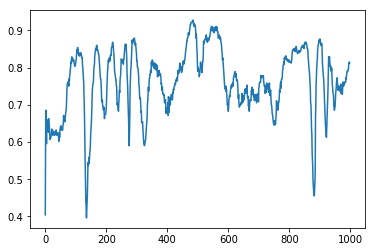

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

x = list(range(0, len(accuracy)))

new = plt.figure()
plt.plot(x, accuracy, "-", marker="None")

max_accuracy = max(accuracy)
acc = max_accuracy
max_accuracy = [i for i, j in enumerate(accuracy) if j == max_accuracy]
max_accuracy = max_accuracy[0]
print(max_accuracy, acc)

In [123]:
# NN model code
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(20, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(20, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(3, activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
abcd = model.fit(trainingData, targetData, epochs=100, validation_split=0.2)

abcd.history["acc"]


Train on 113 samples, validate on 29 samples
Epoch 1/100
113/113 [==============================] - 2s 13ms/step - loss: 1.1139 - acc: 0.3894 - val_loss: 1.1106 - val_acc: 0.3448
Epoch 2/100
113/113 [==============================] - 0s 88us/step - loss: 1.1048 - acc: 0.3628 - val_loss: 1.1020 - val_acc: 0.3448
Epoch 3/100
113/113 [==============================] - 0s 88us/step - loss: 1.0962 - acc: 0.3628 - val_loss: 1.0947 - val_acc: 0.3448
Epoch 4/100
113/113 [==============================] - 0s 97us/step - loss: 1.0903 - acc: 0.3628 - val_loss: 1.0901 - val_acc: 0.3448
Epoch 5/100
113/113 [==============================] - 0s 88us/step - loss: 1.0863 - acc: 0.3628 - val_loss: 1.0866 - val_acc: 0.3448
Epoch 6/100
113/113 [==============================] - 0s 88us/step - loss: 1.0829 - acc: 0.3628 - val_loss: 1.0832 - val_acc: 0.3448
Epoch 7/100
113/113 [==============================] - 0s 88us/step - loss: 1.0800 - acc: 0.3628 - val_loss: 1.0803 - val_acc: 0.3448
Epoch 8/100
113/1

[0.3893805317646634,
 0.36283185919829175,
 0.3628318602532412,
 0.3628318597257665,
 0.3628318602532412,
 0.362831858670817,
 0.3628318602532412,
 0.3628318602532412,
 0.36283185906642307,
 0.3628318597257665,
 0.3628318597257665,
 0.36283185853894834,
 0.3893805328196129,
 0.39823008915491864,
 0.3982300903417368,
 0.40707964733638596,
 0.407079650237497,
 0.4159292048585098,
 0.4159292048585098,
 0.41592920723214616,
 0.38938053519324917,
 0.3982300887593126,
 0.3982300887593126,
 0.4159292048585098,
 0.4159292043310351,
 0.42477876290810845,
 0.4336283187159395,
 0.4336283222763939,
 0.44247787742488154,
 0.44247787742488154,
 0.46017699194165457,
 0.4601769924691293,
 0.4601769924691293,
 0.44247788032599256,
 0.46017699141417984,
 0.46017699128231115,
 0.46017699194165457,
 0.46017699194165457,
 0.4601769953702403,
 0.46902654893630374,
 0.4690265528923642,
 0.46017699194165457,
 0.47787610645842765,
 0.48672566450802623,
 0.47787610645842765,
 0.48672566450802623,
 0.51327433839

483 0.926966293139404


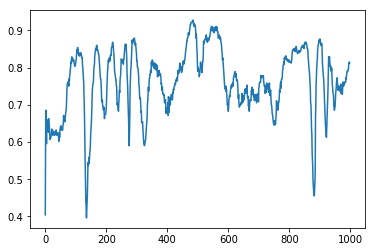

In [15]:
new = plt.figure()
plt.plot(x, accuracy, "-", marker="None")



max_accuracy = max(accuracy)
acc = max_accuracy
max_accuracy = [i for i, j in enumerate(accuracy) if j == max_accuracy]
max_accuracy = max_accuracy[0]
print(max_accuracy, acc)

In [19]:
trainingData = np.vstack((xData, yData)).T
np.shape(trainingData)

(178, 2)

In [34]:
Data = np.transpose(tData[0])

print(np.shape(Data))
print(np.shape(targetData))

(178, 13)
(178, 3)


In [60]:

# Neural net on the high dimensional space
Data = np.transpose(tData[0])

# NN model code
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(50, input_dim = 13, 
                                activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(50, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(3, activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

nnet = model.fit(Data, targetData, epochs=3)
accuracy.append(np.mean(nnet.history["acc"]))

Epoch 1/3


InvalidArgumentError: Tensor dense_3_input:0, specified in either feed_devices or fetch_devices was not found in the Graph